# Google Brain - Ventilator Pressure Prediction

In [1]:
# Installing the modules

!pip3 install kaggle

In [16]:

# Required modules

import numpy as np
import pandas as pd
import seaborn as sns

from zipfile import ZipFile
from google.colab import files
from matplotlib import pyplot as plt

from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Config

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 12)

In [4]:
# Upload the creds

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anurag1817","key":"9b36708a099e8c790eb5eae4d5731fdb"}'}

In [5]:
# Create kaggle folder

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# Test the command

!kaggle competitions download -c ventilator-pressure-prediction

401 - Unauthorized


In [11]:
# Opening the zipfile

with ZipFile('ventilator-pressure-prediction.zip', 'r') as zf:
    zf.extractall('./')

In [12]:
# Load the train data

train = pd.read_csv('train.csv', index_col=['id'])
train.head()

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,breath_id,R,C,time_step,u_in,u_out,pressure
id,,,,,,,
1,1,20,50,0.000000,0.083334,0,5.837492
2,1,20,50,0.033652,18.383041,0,5.907794
3,1,20,50,0.067514,22.509278,0,7.876254
4,1,20,50,0.101542,22.808822,0,11.742872
5,1,20,50,0.135756,25.355850,0,12.234987


In [13]:
# Inspecting the train data

train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6036000 entries, 1 to 6036000
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   breath_id  int64  
 1   R          int64  
 2   C          int64  
 3   time_step  float64
 4   u_in       float64
 5   u_out      int64  
 6   pressure   float64
dtypes: float64(3), int64(4)
memory usage: 368.4 MB


,breath_id,R,C,time_step,u_in,u_out,pressure
count,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06
mean,6.283886e+04,2.703618e+01,2.608072e+01,1.307225e+00,7.321615e+00,6.204493e-01,1.122041e+01
std,3.633526e+04,1.959549e+01,1.715231e+01,7.659778e-01,1.343470e+01,4.852752e-01,8.109703e+00
min,1.000000e+00,5.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.895744e+00
25%,3.137700e+04,5.000000e+00,1.000000e+01,6.428995e-01,3.936623e-01,0.000000e+00,6.329607e+00
50%,6.276550e+04,2.000000e+01,2.000000e+01,1.308123e+00,4.386146e+00,1.000000e+00,7.032628e+00
75%,9.430100e+04,5.000000e+01,5.000000e+01,1.965502e+00,4.983895e+00,1.000000e+00,1.364103e+01
max,1.257490e+05,5.000000e+01,5.000000e+01,2.937238e+00,1.000000e+02,1.000000e+00,6.482099e+01


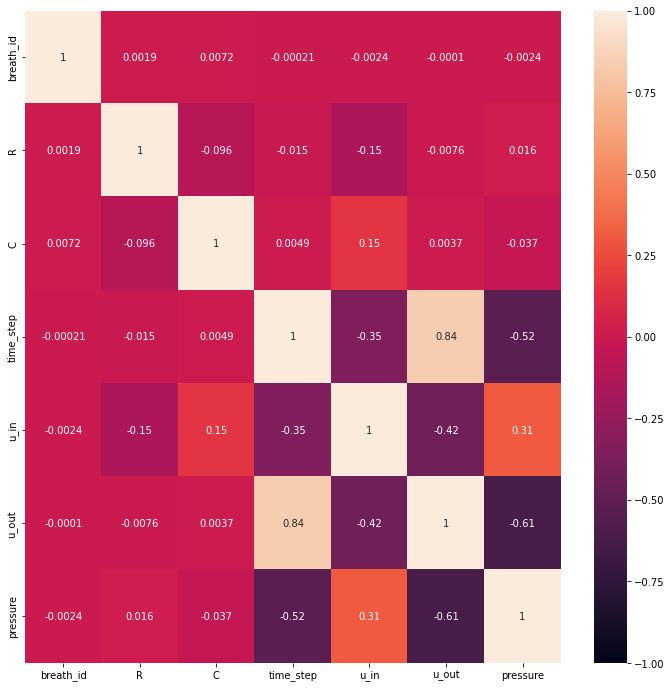

In [14]:
# Correlation matrix

sns.heatmap(train.corr(), annot=True, vmin=-1, vmax=1)

In [15]:
# Missing values

if train.isna().any().any():
    print(train.isna().sum()/train.shape[0])
else:
    print("No Mising values")

No Mising values


In [17]:
# Seperating out features and labels

X = train.drop(['pressure'], axis=1)
y = train['pressure']

In [18]:
# Train and Test split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [19]:
# Fit a XGB Classifier

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

[16:34:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:34:58] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [20]:
# Evaluting the model(on train)

xgb.score(X_train, y_train)

0.6953425594940239

In [21]:
# Evaluting the model(on valid)

xgb.score(X_valid, y_valid)

0.6959801968185086

In [23]:
# Loading the test set

test = pd.read_csv('test.csv', index_col=['id'])
test.head()

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,breath_id,R,C,time_step,u_in,u_out
id,,,,,,
1,0,5,20,0.000000,0.000000,0
2,0,5,20,0.031904,7.515046,0
3,0,5,20,0.063827,14.651675,0
4,0,5,20,0.095751,21.230610,0
5,0,5,20,0.127644,26.320956,0


In [24]:
# Prediction on test set

test_pred = xgb.predict(test)

In [25]:
# Submission

submission = pd.read_csv('sample_submission.csv')
submission['pressure'] = test_pred
submission.to_csv('output.csv', index=False)

In [27]:
# Submission

!kaggle competitions submit -c ventilator-pressure-prediction -f output.csv -m "XGB"

401 - Unauthorized
